<a href="https://colab.research.google.com/github/gurbaaz19/Event-Analysis/blob/master/BSTS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycausalimpact

In [4]:
# Data processing
import pandas as pd
import numpy as np
from datetime import datetime

# Create synthetic time-series data
from statsmodels.tsa.arima_process import ArmaProcess

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Causal impact
from causalimpact import CausalImpact

In [12]:
# Set up a seed for reproducibility
np.random.seed(46)

# Autoregressive coefficients
arparams = np.array([.95, .05])

# Moving average coefficients
maparams = np.array([.6, .3])

# Create a ARMA process
arma_process = ArmaProcess.from_coeffs(arparams, maparams)

# Create the control time-series
X1 = 10 + arma_process.generate_sample(nsample=5000)

X2 = 20 + 5*arma_process.generate_sample(nsample=5000)

# Create the response time-series
y = 3 * X1 + 4*X2 + np.random.normal(size=5000)

# Add the true causal impact
y[3000:] += 10

In [13]:
# Create dates
dates = pd.date_range('2021-01-01', freq='D', periods=5000)

# Create dataframe
df = pd.DataFrame({'dates': dates, 'y': y, 'X1': X1, 'X2': X2}, columns=['dates', 'y', 'X1', 'X2'])

# Set dates as index
df.set_index('dates', inplace=True)

# Take a look at the data
df.head()

,y,X1,X2
dates,,,
2021-01-01,95.560487,10.584876,16.098331
2021-01-02,128.776925,12.137753,23.095959
2021-01-03,177.491217,13.796190,33.792300
2021-01-04,216.678539,13.776539,43.527402
2021-01-05,219.876694,13.956607,44.866334


In [14]:
# df.to_csv()

'dates,y,X1,X2\n2021-01-01,95.56048672599029,10.584875839870518,16.09833135798809\n2021-01-02,128.7769247019418,12.13775329223987,23.095959452206277\n2021-01-03,177.49121746764894,13.796189879848084,33.79229974435927\n2021-01-04,216.678539289892,13.776538573804103,43.527402229063306\n2021-01-05,219.87669417316,13.956607434357853,44.86633397478066\n2021-01-06,208.74398604450244,13.778910808177713,41.91781707559497\n2021-01-07,218.55232718548675,13.732545670432115,44.897958899158795\n2021-01-08,214.59438737451993,13.072447371840846,43.91905521485822\n2021-01-09,191.52303738952233,12.65063561943015,38.10867299975452\n2021-01-10,183.0920465193024,13.303248227520594,36.104525654436905\n2021-01-11,193.2903151157921,12.894735387852641,38.48224462236221\n2021-01-12,204.01806876860576,12.671498482542358,41.73275775630242\n2021-01-13,226.09065611304064,13.99899309099598,46.03444491035358\n2021-01-14,256.30769290324736,14.407509268322642,53.749630166115054\n2021-01-15,248.01701091275888,14.182844

In [15]:
# Print out the time series start date
print(f'The time-series start date is :{df.index.min()}')

# Print out the time series end date
print(f'The time-series end date is :{df.index.max()}')

# Print out the intervention start date
print(f'The treatment start date is :{df.index[3000]}')

The time-series start date is :2021-01-01 00:00:00
The time-series end date is :2034-09-09 00:00:00
The treatment start date is :2029-03-20 00:00:00


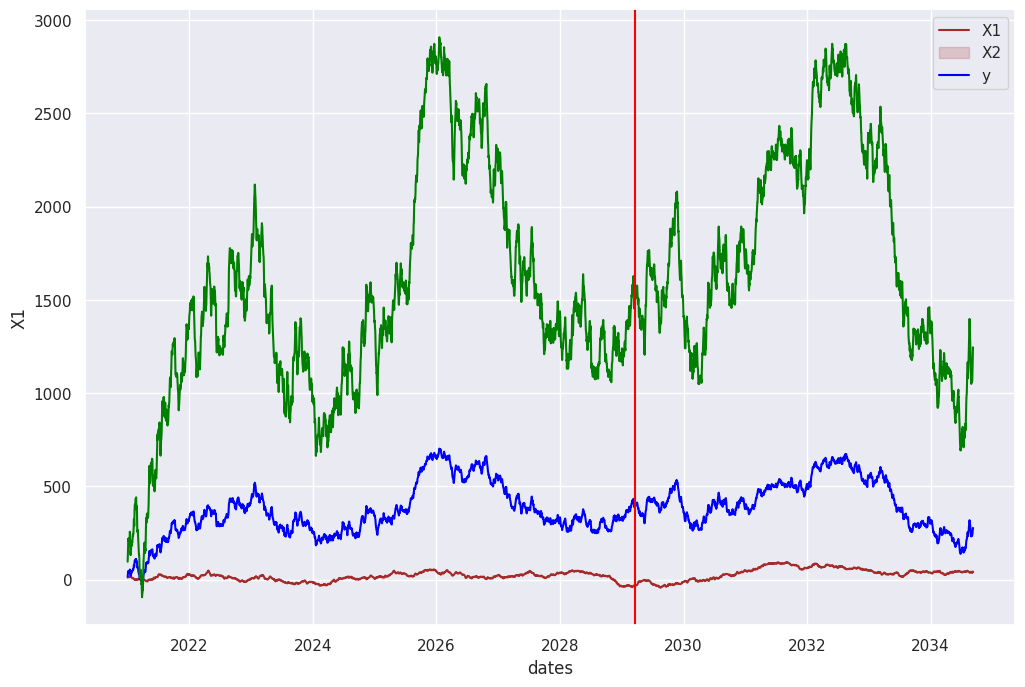

In [18]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=df.index, y=df['X1'], color='brown')
sns.lineplot(x=df.index, y=df['X2'], color='blue')
sns.lineplot(x=df.index, y=df['y'], color='green')
plt.axvline(x= df.index[3000], color='red')
plt.legend(labels = ['X1', 'X2', 'y'])